In [2]:
# import libraries
import json
import pandas as pd
import os

In [3]:
os.listdir("done")

['ntbk-0.py',
 'route_id.csv',
 'route_id_0.csv',
 'route_id_4.csv',
 'stats_entropy_dict0.json',
 'stats_entropy_dict4.json',
 'stats_entropy_dictroute_id_1_0.json',
 'stats_entropy_dictroute_id_1_1.json',
 'stats_entropy_dictroute_id_1_2.json',
 'stats_entropy_dictroute_id_1_3.json',
 'stats_entropy_dictroute_id_1_4.json',
 'stats_entropy_dictroute_id_2_0.json',
 'stats_entropy_dictroute_id_2_1.json',
 'stats_entropy_dictroute_id_2_2.json',
 'stats_entropy_dictroute_id_2_3.json',
 'stats_entropy_dictroute_id_2_4.json',
 'stats_entropy_dictroute_id_3_0.json',
 'stats_entropy_dictroute_id_3_1.json',
 'stats_entropy_dictroute_id_3_2.json',
 'stats_entropy_dictroute_id_3_3.json',
 'stats_entropy_dictroute_id_3_4.json']

In [4]:
main_dict = {}

In [5]:
# read all the json files and store them in a single dict
for file in os.listdir("done"):
    if file[-5:] == ".json":
        with open("done/" + file, "r") as f:
            # main_dict[file] = json.load(f)
            data = json.load(f)
            for key, value in data.items():
                main_dict[key] = value

In [6]:
len(main_dict)

2876

## read the past data file


In [7]:
%pip install openpyxl

In [8]:
# read xlsx file
old_df = pd.read_excel(
    "G:/My Drive/Graduacao/Outros/congresso_anpet_2023/Resultados/tests1/los_angeles_routes.xlsx",
    sheet_name="main",
)

In [9]:
old_df.head()

,city,route_id,route_score,lat_cg_mean,lon_cg_mean,lat_cg_std,lon_cg_std,n_stops,n_depots,n_pckgs,...,st_orient_std,n_edges,quad_sum_deviation,dominant_direction,dominant_prcntg,scnd_dominant_direction,scnd_dominant_percntg,mean_deviation,skew,kurtosis
0,los_angeles,RouteID_0516c035-87a6-414a-a031-d8cab8ae8a0a,1,34.110581,-118.329547,0.003563,0.002670,81,1,161,...,0.700,14566.0,0.308,"(0, 10]",7.140,"(160, 170]",7.030,0.107,-0.054,1.503
1,los_angeles,RouteID_07d46ee6-2edc-4d6b-be85-751d2496aaa1,1,34.283958,-118.488474,0.007850,0.011922,188,1,278,...,0.662,10963.0,15.058,"(90, 100]",20.341,"(0, 10]",18.645,0.616,-0.032,1.761
2,los_angeles,RouteID_08eca476-373b-4d96-878d-2dbee9ad5c2c,1,33.835381,-117.846501,0.004763,0.006181,116,1,201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,los_angeles,RouteID_128fddbe-af47-4d21-9f7c-c8a6ecc6a162,1,33.803947,-117.822601,0.005246,0.005546,172,1,259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,los_angeles,RouteID_13ad1fc8-faed-4fbc-a5ff-04463fb0603d,1,33.614645,-117.640072,0.007916,0.004622,176,1,275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
variables = [
    "city",
    "route_score",
    "lat_cg_mean",
    "lon_cg_mean",
    "lat_cg_std",
    "lon_cg_std",
    "n_stops",
    "n_pckgs",
    "n_delivered_pckgs",
    "n_rejected_pckgs",
    "n_failed_pckgs",
    "pckgs_stop_ratio",
    "rejected_pckgs_ratio",
    "delivered_pckgs_ratio",
    "failed_pckgs_ratio",
    "bbox_area",
    "bbox_north",
    "bbox_south",
    "bbox_east",
    "bbox_west",
    "total_euclidean_dist",
    "total_driving_dist",
    "total_cf",
    "avg_euclidean_per_stop",
    "avg_driving_per_stop",
    "avg_cf_per_stop",
    "min_cf_per_stop",
    "max_cf_per_stop",
    "median_cf_per_stop",
]

## add old data to the new df


In [11]:
new_dict = {}

In [12]:
for key, value in main_dict.items():
    new_dict[key] = value
    for var in variables:
        new_dict[key][var] = old_df.loc[old_df["route_id"] == key, var].values[0]

In [13]:
new_dict

{'RouteID_4db24e6e-58e3-489f-8422-a1c3515b0591': {'street_length_total': 617063.8399999996,
  'street_density_km': 13289.854576277576,
  'intersection_count': 2484,
  'intersection_density_km': 53.498514460794716,
  'k_avg': 3.0961968680089487,
  'entropy': 3.0435561210496074,
  'city': 'los_angeles',
  'route_score': 3,
  'lat_cg_mean': 34.02595635,
  'lon_cg_mean': -118.2955618,
  'lat_cg_std': 0.005395316,
  'lon_cg_std': 0.003842863,
  'n_stops': 116,
  'n_pckgs': 227,
  'n_delivered_pckgs': 218,
  'n_rejected_pckgs': 0,
  'n_failed_pckgs': 9,
  'pckgs_stop_ratio': 1.956896552,
  'rejected_pckgs_ratio': 0.0,
  'delivered_pckgs_ratio': 0.960352423,
  'failed_pckgs_ratio': 0.039647577,
  'bbox_area': 92.87826175,
  'bbox_north': 34.036354,
  'bbox_south': 34.007369,
  'bbox_east': -118.143927,
  'bbox_west': -118.30027,
  'total_euclidean_dist': 45.05222975,
  'total_driving_dist': 62.921,
  'total_cf': 1.396623438,
  'avg_euclidean_per_stop': 0.385061793,
  'avg_driving_per_stop': 0

In [14]:
new_df = pd.DataFrame.from_dict(new_dict, orient="index")

In [15]:
new_df.head()

,street_length_total,street_density_km,intersection_count,intersection_density_km,k_avg,entropy,city,route_score,lat_cg_mean,lon_cg_mean,...,bbox_west,total_euclidean_dist,total_driving_dist,total_cf,avg_euclidean_per_stop,avg_driving_per_stop,avg_cf_per_stop,min_cf_per_stop,max_cf_per_stop,median_cf_per_stop
RouteID_4db24e6e-58e3-489f-8422-a1c3515b0591,617063.840,13289.854576,2484,53.498514,3.096197,3.043556,los_angeles,3,34.025956,-118.295562,...,-118.300270,45.052230,62.921,1.396623,0.385062,0.537786,1.367465,0.993684,4.462076,1.143612
RouteID_67da99e8-4bf6-4045-b5f7-816780a0099f,609000.776,13136.636769,2459,53.042609,3.091525,3.047739,los_angeles,3,34.027675,-118.296037,...,-118.300086,44.685352,54.431,1.218095,0.360366,0.438960,1.236765,0.808562,4.529929,1.010198
RouteID_7a562420-3604-4b49-86e4-e54be08f64d8,613446.943,13322.388953,2467,53.576489,3.095829,3.040000,los_angeles,3,34.028215,-118.294421,...,-118.300279,43.467387,56.367,1.296765,0.381293,0.494447,1.308960,0.000000,4.048514,1.247851
RouteID_90da1269-9ea6-4b43-9fb8-db3d9ff10074,618383.024,13317.329182,2488,53.580894,3.098287,3.042303,los_angeles,3,34.026924,-118.295475,...,-118.300281,45.972474,60.598,1.318137,0.340537,0.448874,1.367273,0.000000,9.539042,1.065627
RouteID_05d1a771-aa16-43b6-ab00-9ad7161d5617,446464.704,10066.746504,1665,37.541899,2.693346,2.645778,los_angeles,2,34.231662,-118.434421,...,-118.584210,55.034050,69.191,1.257240,0.335573,0.421896,1.421227,0.939492,4.435695,1.252109


In [16]:
# add a variable called "intersec_per_km" to the dataframe
# this is the division of "intersection_count" by "street_length_total"
new_df["intersec_per_km"] = new_df["intersection_count"] / new_df["street_length_total"]

In [17]:
# export to excel
# new_df.to_excel(
#     "G:/My Drive/Graduacao/Outros/congresso_anpet_2023/Resultados/los_angeles_new_bbox_routes.xlsx",
#     sheet_name="main",
# )

In [18]:
len(new_df)

2876

## start analysis


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# plot correlation matrix considering all variables in new_df.columns that do not contain strings

to_be_excluded = [
    "route_id",
    "city",
    # "bbox_area",
    # "bbox_north",
    "bbox_south",
    # "bbox_east",
    "bbox_west",
    # "avg_cf_per_stop",
    # "min_cf_per_stop",
    "max_cf_per_stop",
    "k_avg",
    "n_pckgs",
    "n_failed_pckgs",
    "n_delivered_pckgs",
    "n_rejected_pckgs",
    "failed_pckgs_ratio",
    "intersection_count",
    "street_length_total",
    "n_stops",
    "avg_euclidean_per_stop",
    "total_euclidean_dist",
    # "street_density_km",
    "avg_driving_per_stop",
    "lat_cg_mean",
    "lon_cg_mean",
    "intersection_density_km",
    # "intersection_per_km",
]

to_be_included = new_df.columns[~new_df.columns.isin(to_be_excluded)]

# using exclude variables
corr = new_df[to_be_included].corr()

# not using exclude variables
# corr = new_df.corr()

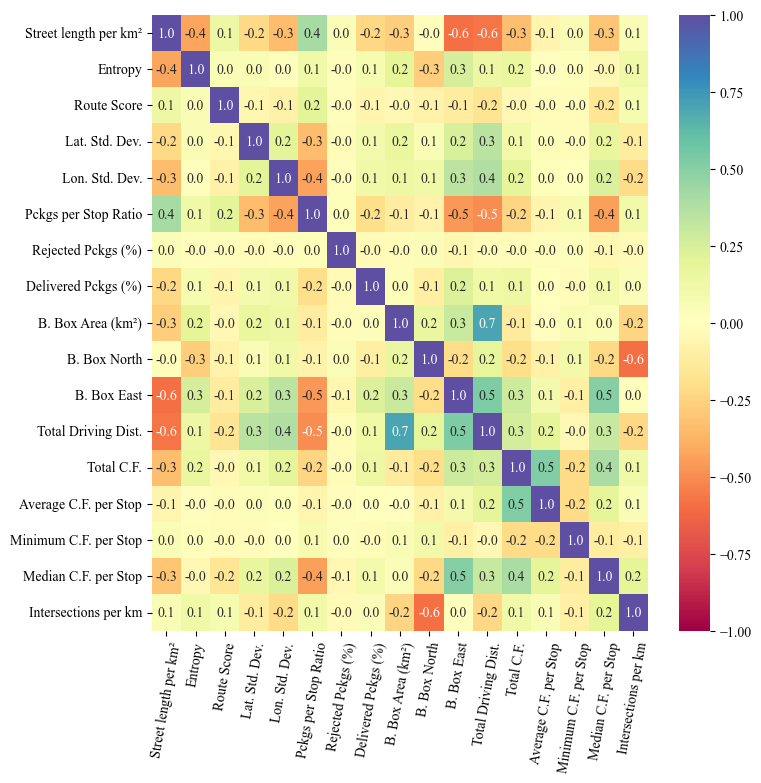

In [74]:
# change font to times new roman
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize=(8, 8))

x_axis_labels = [
    "Street length per km²",
    "Entropy",
    "Route Score",
    "Lat. Std. Dev.",
    "Lon. Std. Dev.",
    "Pckgs per Stop Ratio",
    "Rejected Pckgs (%)",
    "Delivered Pckgs (%)",
    "B. Box Area (km²)",
    "B. Box North",
    "B. Box East",
    "Total Driving Dist.",
    "Total C.F.",
    "Average C.F. per Stop",
    "Minimum C.F. per Stop",
    "Median C.F. per Stop",
    "Intersections per km",
]
y_axis_labels = x_axis_labels

sns.heatmap(
    corr,
    annot=True,
    cmap="Spectral",
    vmin=-1,
    vmax=1,
    label="big",
    xticklabels=x_axis_labels,
    yticklabels=y_axis_labels,
    fmt=".1f",
)
plt.xticks(rotation=80)

plt.show()

In [95]:
# how many possible combinations do I have for a linear regression model where the dependent variable is "total_cf" and the independent variables are all the other variables in the dataframe?

from itertools import combinations

# create a list with all the variables in the dataframe
variables = list(to_be_included)

# romove the rouste_score, temporally
variables = variables[:2] + variables[3:-5] + variables[-4:]

variables, len(variables)

(['street_density_km',
  'entropy',
  'lat_cg_std',
  'lon_cg_std',
  'pckgs_stop_ratio',
  'rejected_pckgs_ratio',
  'delivered_pckgs_ratio',
  'bbox_area',
  'bbox_north',
  'bbox_east',
  'total_driving_dist',
  'avg_cf_per_stop',
  'min_cf_per_stop',
  'median_cf_per_stop',
  'intersec_per_km'],
 15)

In [96]:
Y = ["total_cf"]
X = variables


# create a list with all the possible combinations of variables
combs = []
for i in range(1, len(X) + 1):
    els = [list(x) for x in combinations(X, i)]
    combs.extend(els)

len(combs)

32767

In [101]:
# iterate over the combs, calculate the R² and store the results in a dict
results = {}

for index, comb in enumerate(combs):
    # calculate the R²
    r2 = new_df[["total_cf"] + comb].corr().iloc[0, 1] ** 2

    print(f"\r{index + 1}/{len(combs)} - {comb} - R²: {r2:.3f}", end="", flush=True)

    # save the results in a dict
    results[index] = r2

    # if index > 10000:
    #     break

32767/32767 - ['street_density_km', 'entropy', 'lat_cg_std', 'lon_cg_std', 'pckgs_stop_ratio', 'rejected_pckgs_ratio', 'delivered_pckgs_ratio', 'bbox_area', 'bbox_north', 'bbox_east', 'total_driving_dist', 'avg_cf_per_stop', 'min_cf_per_stop', 'median_cf_per_stop', 'intersec_per_km'] - R²: 0.110

In [102]:
# find the combination with the highest R²
best = max(results, key=results.get)
best

11

In [103]:
# get the combination with the highest R²
combs[best]

['avg_cf_per_stop']

In [104]:
# print the highest R²
results[best]

0.26644470729856135

In [105]:
len(new_df)

2876